In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<p>Ejemplo de red neuronal con 2 capas y funcion de salida $ g(x) $ Sigmoide (o funcion de regresion logística) </p>
<p>Ejemplo con el conjunto de información definido por las notas de la clase RedesNeuronales17Eng.pdf</p>

In [4]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

<p>En esta parte se declara :</p>
1. El numero de neuronas en la capa de inicio
2. El numero de elementos en el conjunto de salida
3. Los inputs necesarios para el calculo

In [5]:
?tf.random_uniform([input_size,output_layer_size], -1, 1)

In [6]:
input_size=2
output_layer_size=1
#Los tf.placeholders son para los datos de entrada
x = tf.placeholder(tf.float32,[None,input_size])
y_ = tf.placeholder(tf.float32,[None,output_layer_size])
#La variable para la que se va a ir recalculando
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size],-1,1), name="W_layer1")
b_layer1=tf.Variable(tf.zeros([output_layer_size]), name="b_layer")

Funcion de transferencia de tipo Sigmoide que recibe como entrada  el producto de la proyección lineal con los pesos iniciales y los va actualizando

In [7]:
y=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)

Funcion de pérdida

In [8]:
lossfn=tf.reduce_mean(tf.reduce_sum(y_-y)**2)

Funcion de Entrenamiento

In [9]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

Inicializa las variables y la sesion 

In [10]:
init = tf.initialize_all_variables()
sess=tf.Session()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Activando la session de TensorFlow para hacer el entrenamiento

In [11]:
sess.run(init)
for i in range(5000):
    sess.run(train_step,feed_dict={x:X,y_:Y})

In [12]:
print(sess.run(y,feed_dict={x:[[0.8,0.5]]}))

[[ 0.24966639]]


In [13]:
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.062817  ]
 [-0.57066077]]


Más defiiniciones Perdiccion 

Cuantificando el error

In [15]:
correct_prediction = tf.equal(tf.round(y),y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
print(sess.run(accuracy,feed_dict={x:X,y_:Y}))

0.75


Vizualizando la Barrera de Decisión. Para ello es necesario extraer las w's del grafo de Tensorflow

In [17]:
w=[sess.run(b_layer1,feed_dict={x:X,y_:Y})[0]]+[i[0] for i in sess.run(W_layer1,feed_dict={x:X,y_:Y})]

<p>Usemos los pesos para predecir el valro del la linea clasificadora (nota.- los pesos son los que fueron entrenados con la red neuronal en tensorflow)</p>
<p> $ w^{T}*X = B \Rightarrow ^{} w_{0}+w_{1}x_{1}^{i}+w_{2}x_{2}^{i}=B \Rightarrow ^{}  \overbrace{w_{0}} +w_{1}x_{1}^{i}+w_{2}x_{2}^{i}=0  $ </p>
<p> Por lo que la ecuacion anterior define la Barrera de Decision. Y su ordenada y coordenada al origen corresonpen a:</p>
$$ X_{1} =  - \frac{\overbrace{w_{0}}+w_{2}x_{2}^{i}}{w_{1}}     $$
<p> y </p>
$$ X_{2} = - \frac{\overbrace{w_{0}}+w_{1}x_{1}^{i}}{w_{2}} $$
<p> Por lo tanto : </p>
$$ x_{1}= 0  \Rightarrow ^{} (0,- \frac{\overbrace{w_{0}}}{w_{1}} ) $$
<p> y </p>
$$ x_{2}= 0  \Rightarrow ^{} (- \frac{\overbrace{w_{0}}}{w_{2}}, 0) $$
<p> Por último la pendiente es igual a : </p>
$$ m = \frac{\partial x_{2} }{\partial x_{1}} =  - \frac{w_{1}}{w_{2}} $$

<p>Ahora podemos definir a la recta que pasa por los puntos: $  (0,- \frac{\overbrace{w_{0}}}{w_{1}} ) $, $   (- \frac{\overbrace{w_{0}}}{w_{2}}, 0)  $ y que tiene pendiente $ m = - \frac{\overbrace{w_{1}}}{w_{2}} $, usando los resultados anteriores $x_{1}=0 $ y $ x_{2}= - \frac{w_{0}}{w_{2}}$: </p>
$$ \Rightarrow ^{}  x_{2} - \frac{w_{0}}{w_{2}} = m(x_{1}-0 )    $$
$$   \Rightarrow ^{}   x_{2} =   - \frac{w_{1}}{w_{2}}x_{1}  +\frac{\overbrace{w_{0}}}{w_{2}}                    $$


In [38]:
#Calculamos la pendiente
m=-w[1]/w[2]
print("La pendiente m es igual a :")
m

La pendiente m es igual a :


0.11007766

In [22]:
print("La ordenada al origen a  es igual a ")
w[0]/w[2]

La ordenada al origen a  es igual a 


1.5163395

In [25]:
print("El punto faltante :")
(0,-w[0]/w[1])

El punto faltante :


(0, 13.77518)

In [27]:
print("El punto faltante :")
(-w[0]/w[2],0)

El punto faltante :


(-1.5163395, 0)

(-5.2, 5.2)

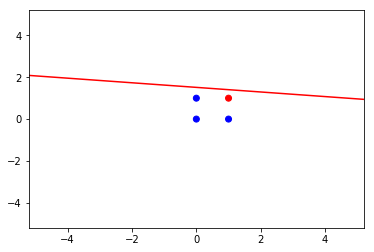

In [44]:
plt.scatter(X[:,0],X[:,1],c=['red' if i == 1 else 'blue' for i in Y])
x1=np.linspace(-5.2,5.2,100)
plt.plot(x1,+w[0]/w[2]-m*x1,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [43]:
?np.linspace

In [45]:
sess.close()

Funcion XOR
Clasificador basado en redes neuronales